## About Delhivery

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities.

The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors

## Purpose

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

## Column Profiling:

* data - tells whether the data is testing or training data
* trip_creation_time – Timestamp of trip creation
* route_schedule_uuid – Unique Id for a particular route schedule
* route_type – Transportation type
* FTL – Full Truck Load: FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way
* Carting: Handling system consisting of small vehicles (carts)
* trip_uuid - Unique ID given to a particular trip (A trip may include different source and destination centers)
* source_center - Source ID of trip origin
* source_name - Source Name of trip origin
* destination_cente – Destination ID
* destination_name – Destination Name
* od_start_time – Trip start time
* od_end_time – Trip end time
* start_scan_to_end_scan – Time taken to deliver from source to destination
* is_cutoff – Unknown field
* cutoff_factor – Unknown field
* cutoff_timestamp – Unknown field 
* actual_distance_to_destination – Distance in Kms between source and destination warehouse
* actual_time – Actual time taken to complete the delivery (Cumulative)
* osrm_time – An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative)
* osrm_distance – An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative)
* factor – Unknown field 
* segment_actual_time – This is a segment time. Time taken by the subset of the package delivery
* segment_osrm_time – This is the OSRM segment time. Time taken by the subset of the package delivery
* segment_osrm_distance – This is the OSRM distance. Distance covered by subset of the package delivery
* segment_factor – Unknown field


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
dt = pd.read_csv('delhivery_data.csv')

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [4]:
dt.isna().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [5]:
r = dt.shape[0]
c = dt.shape[1]
print(f'The Total number of Rows - {r} and Total number of Columns = {c}')

The Total number of Rows - 144867 and Total number of Columns = 24


### Statistical  Summary

In [6]:
dt.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


### Dropping the Unknown Columns

In [7]:
dt.drop(['segment_factor', 'factor', 'cutoff_timestamp', 'cutoff_factor', 'is_cutoff'], axis = 1, inplace = True)

### Handling / Imputing the null Values

In [8]:
dt['source_name'].fillna('City_place_code (State)', inplace = True)
dt['destination_name'].fillna('City_place_code (State)', inplace = True)

### Outlier detection

In [9]:
def outlier(data):
    '''
    Function to Identify Outliers      
    '''
    for i in data:
        if type(data[i].values[0])!=str:
            iqr = np.percentile(data[i], 75) - np.percentile(data[i], 25)
            upper_limit = np.percentile(data[i], 75) + iqr*1.5 
            lower_limit = np.percentile(data[i], 25) - iqr*1.5 
            l = len(data[i][(data[i]<lower_limit) | (data[i]>upper_limit)])
            print(f'Number of possible outliers in {i} =',l)

In [10]:
outlier(dt)

Number of possible outliers in start_scan_to_end_scan = 373
Number of possible outliers in actual_distance_to_destination = 17992
Number of possible outliers in actual_time = 16633
Number of possible outliers in osrm_time = 17603
Number of possible outliers in osrm_distance = 17816
Number of possible outliers in segment_actual_time = 9298
Number of possible outliers in segment_osrm_time = 6378
Number of possible outliers in segment_osrm_distance = 4315


### Visualizing Data and Outliers

Text(0.5, 1.0, 'Distribution and Outliers of segment_osrm_time')

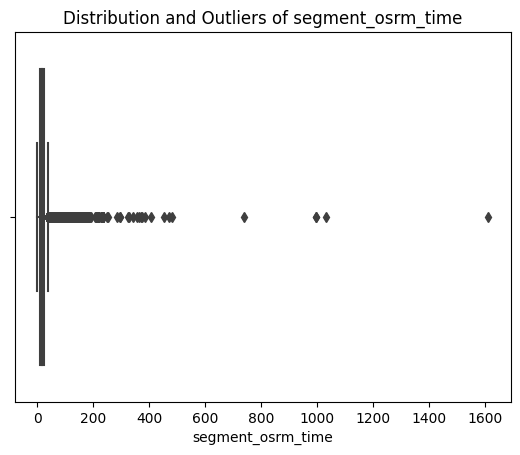

In [11]:
sns.boxplot(data = dt, x ='segment_osrm_time' )
plt.title('Distribution and Outliers of segment_osrm_time')

In [177]:
mi = min(dt['segment_osrm_time'])
ma = max(dt['segment_osrm_time'])
print(f'Minimum value = {mi} and Maximum value = {ma}')

Minimum value = 0.0 and Maximum value = 1611.0


Text(0.5, 1.0, 'Distribution and Outliers of segment_actual_time')

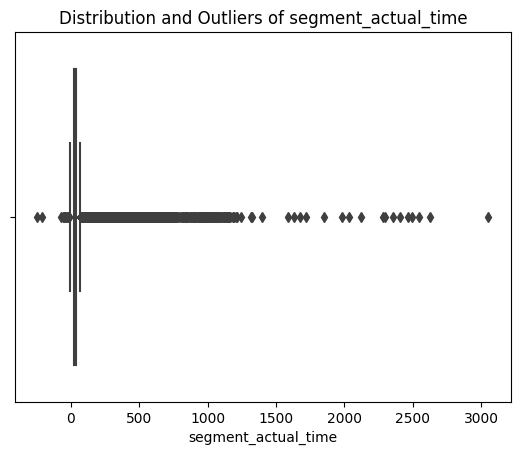

In [12]:
sns.boxplot(data = dt, x ='segment_actual_time' )
plt.title('Distribution and Outliers of segment_actual_time')

In [178]:
mi = min(dt['segment_actual_time'])
ma = max(dt['segment_actual_time'])
print(f'Minimum value = {mi} and Maximum value = {ma}')

Minimum value = -244.0 and Maximum value = 3051.0


Text(0.5, 1.0, 'Distribution and Outliers of osrm_distance')

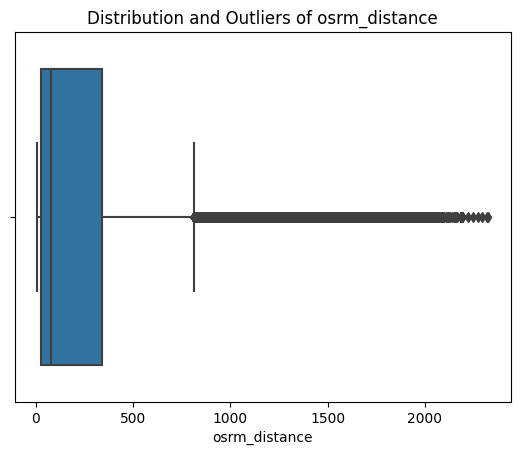

In [13]:
sns.boxplot(data = dt, x ='osrm_distance' )
plt.title('Distribution and Outliers of osrm_distance')

In [179]:
mi = min(dt['osrm_distance'])
ma = max(dt['osrm_distance'])
print(f'Minimum value = {mi} and Maximum value = {ma}')

Minimum value = 9.0082 and Maximum value = 2326.1991000000003


Text(0.5, 1.0, 'Distribution and Outliers of osrm_time')

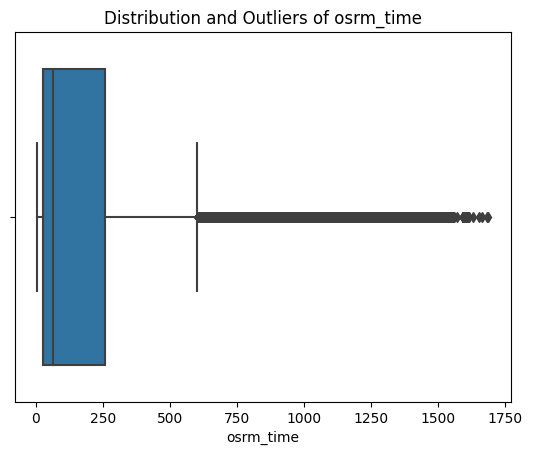

In [14]:
sns.boxplot(data = dt, x ='osrm_time' )
plt.title('Distribution and Outliers of osrm_time')

In [180]:
mi = min(dt['osrm_time'])
ma = max(dt['osrm_time'])
print(f'Minimum value = {mi} and Maximum value = {ma}')

Minimum value = 6.0 and Maximum value = 1686.0


Text(0.5, 1.0, 'Distribution and Outliers of actual_time')

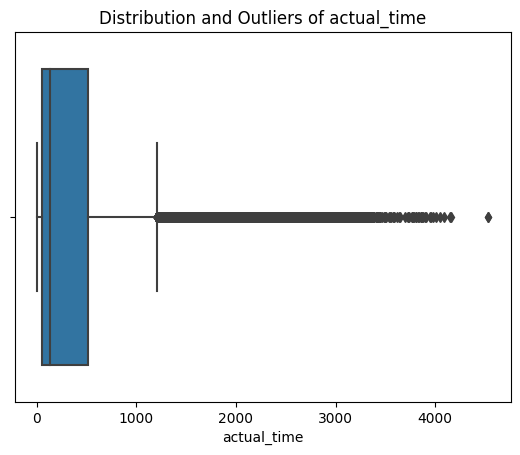

In [15]:
sns.boxplot(data = dt, x ='actual_time' )
plt.title('Distribution and Outliers of actual_time')

In [181]:
mi = min(dt['actual_time'])
ma = max(dt['actual_time'])
print(f'Minimum value = {mi} and Maximum value = {ma}')

Minimum value = 9.0 and Maximum value = 4532.0


Text(0.5, 1.0, 'Distribution and Outliers of actual_distance_to_destination')

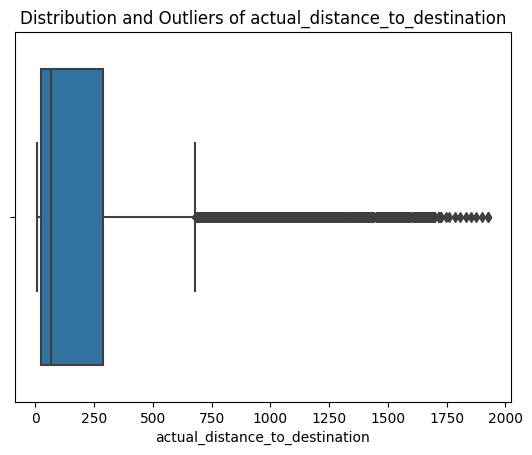

In [16]:
sns.boxplot(data = dt, x ='actual_distance_to_destination' )
plt.title('Distribution and Outliers of actual_distance_to_destination')

In [182]:
mi = min(dt['actual_distance_to_destination'])
ma = max(dt['actual_distance_to_destination'])
print(f'Minimum value = {mi} and Maximum value = {ma}')

Minimum value = 9.00004535977208 and Maximum value = 1927.4477046975032


Text(0.5, 1.0, 'Distribution and Outliers of start_scan_to_end_scan')

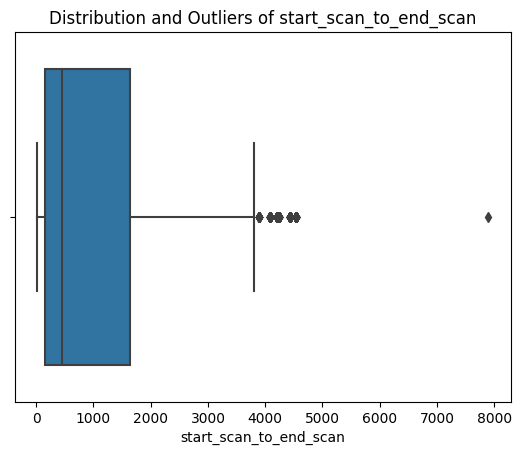

In [17]:
sns.boxplot(data = dt, x ='start_scan_to_end_scan' )
plt.title('Distribution and Outliers of start_scan_to_end_scan')

In [ ]:
mi = min(dt['actual_distance_to_destination'])
ma = max(dt['actual_distance_to_destination'])
print(f'Minimum value = {mi} and Maximum value = {ma}')

In [18]:
dt.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance'],
      dtype='object')

### Extracting City, State and Place_Code

In [19]:
#dt[dt['trip_uuid'] == 'trip-153861115439069069']

In [ ]:
dt['source_city'] = dt['source_name'].str.split('_').apply(lambda x:x[0].split()[0])

dt['source_state'] = dt['source_name'].str.split('_').apply(lambda x:x[-1]).apply(lambda x:x.split('(')[-1][:-1])

dt['source_place-code'] = dt['source_name'].str.split('(').apply(lambda x:x[0]).str.split('_').apply(lambda x:x[1:]).apply(lambda x:'_'.join(x))

In [21]:
dt[['source_city', 'source_state', 'source_place-code']].value_counts().head(3)

source_city  source_state  source_place-code
Gurgaon      Haryana       Bilaspur_HB          23347
Bangalore    Karnataka     Nelmngla_H            9975
Bhiwandi     Maharashtra   Mankoli_HB            9088
dtype: int64

In [22]:
dt['destination_city'] = dt['destination_name'].str.split('_').apply(lambda x:x[0].split()[0])

dt['destination_state'] = dt['destination_name'].str.split('_').apply(lambda x:x[-1]).apply(lambda x:x.split('(')[-1][:-1])

dt['destination_place-code'] = dt['destination_name'].str.split('(').apply(lambda x:x[0]).str.split('_').apply(lambda x:x[1:]).apply(lambda x:'_'.join(x))

In [23]:
dt[['destination_city', 'destination_state', 'destination_place-code']].value_counts().head(3)

destination_city  destination_state  destination_place-code
Gurgaon           Haryana            Bilaspur_HB               15192
Bangalore         Karnataka          Nelmngla_H                11019
Bhiwandi          Maharashtra        Mankoli_HB                 5492
dtype: int64

### Extract features like month, year and day from trip_creation_time

In [24]:
dt['trip_creation_time'] = pd.to_datetime(dt['trip_creation_time'])
dt['trip_creation_time_month'] = dt['trip_creation_time'].dt.month
dt['trip_creation_time_day'] = dt['trip_creation_time'].dt.day
dt['trip_creation_time_year'] = dt['trip_creation_time'].dt.year

In [25]:
dt[['trip_creation_time', 'trip_creation_time_month', 'trip_creation_time_day', 'trip_creation_time_year']].head(2)

,trip_creation_time,trip_creation_time_month,trip_creation_time_day,trip_creation_time_year
0,2018-09-20 02:35:36.476840,9,20,2018
1,2018-09-20 02:35:36.476840,9,20,2018


 ### Time between od_start_time and od_end_time

In [26]:
dt['od_start_time'] = pd.to_datetime(dt['od_start_time'])
dt['od_end_time'] = pd.to_datetime(dt['od_end_time'])

In [27]:
dt['start_end_diff'] = (dt['od_end_time'] - dt['od_start_time']).dt.total_seconds()/60 

### Comparing start_scan_to_end_scan and start_end_diff (Newly formed feature)

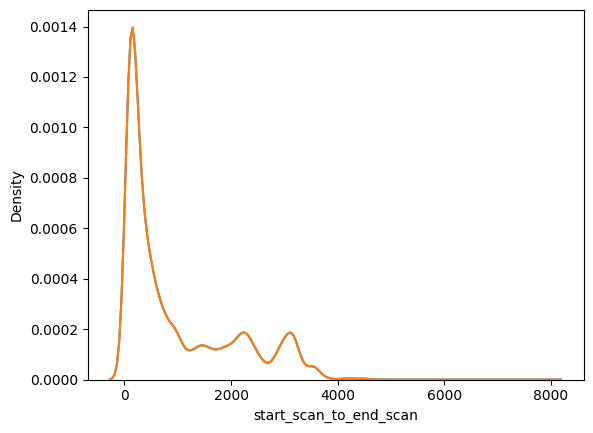

In [28]:
sns.kdeplot(data = dt, x = 'start_scan_to_end_scan')
sns.kdeplot(data = dt, x = 'start_end_diff')
plt.show()

#### We do Hypothesis testing to Check difference between start_end_diff and start_scan_to_end_scan
* Null Hypothesis - There is no difference between start_end_diff and start_scan_to_end_scan
* Alternative Hypothesis - There is significant difference between start_end_diff and start_scan_to_end_scan

In [29]:
ttest_ind(dt['start_scan_to_end_scan'], dt['start_end_diff'], permutations = 100)

Ttest_indResult(statistic=-0.12873063959303033, pvalue=0.84)

#### Because P Value is greater than 0.05, we Fail to reject the Null Hypothesis
#### The difference between start_scan_to_end_scan and start_end_diff is not significant

In [29]:
# dropping route_schedule_uuid because does give much information
dt.drop('route_schedule_uuid', axis = 1, inplace = True)

## Grouping the data with respect to Trip_uuid , Source_center and Destination center

In [30]:
# Dictionary for Aggregating the Values

groupby_dict = {
    
'data':'first',
'trip_creation_time' : 'first',
'route_type' : 'first',
'trip_uuid' : 'first',
'source_name' : 'first',
'destination_name' : 'last',
'od_start_time' : 'first',
'od_end_time' : 'last',
'start_scan_to_end_scan' : 'mean', # difference between od_start_time and od_end_time
'actual_distance_to_destination':'sum',
'actual_time':'last',# Since this is the Cumulative sum and the last value will give the sum of all records in the group, we take only last 
'osrm_time' :'last',   # Since they are Cumulative sums, we only take last one
'osrm_distance':'last',  # Since they are Cumulative sums, we only take last one
'segment_actual_time' : 'sum',
'segment_osrm_time': 'sum',
'segment_osrm_distance':'sum', 
'source_city':'first',
'source_state':'first',
'destination_city':'first',
'destination_state':'first',
'trip_creation_time_month': 'first',
'trip_creation_time_day':'first',
'trip_creation_time_year':'first',
'source_place-code' : 'first',
'destination_place-code': 'first'
   }


In [31]:
dt_grouped = dt.groupby(['trip_uuid', 'source_center', 'destination_center']).aggregate(groupby_dict).reset_index(drop = True)

In [32]:
dt_grouped.head(2)

,data,trip_creation_time,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,...,segment_osrm_distance,source_city,source_state,destination_city,destination_state,trip_creation_time_month,trip_creation_time_day,trip_creation_time_year,source_place-code,destination_place-code
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,3778.765471,...,670.6205,Kanpur,Uttar Pradesh,Gurgaon,Haryana,9,12,2018,Central_H_6,Bilaspur_HB
1,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,5082.046634,...,649.8528,Bhopal,Madhya Pradesh,Kanpur,Uttar Pradesh,9,12,2018,Trnsport_H,Central_H_6


## Grouping the data with respect to Trip_uuid alone

In [33]:
# Dictionary for Aggregating the Values

groupby_dict = {
    
'data':'first',
'trip_creation_time' : 'first',
'route_type' : 'first',
'trip_uuid' : 'first',
'source_name' : 'first',
'destination_name' : 'last',
'od_start_time' : 'first',
'od_end_time' : 'last',
'start_scan_to_end_scan' : 'sum', # difference between od_start_time and od_end_time
'actual_distance_to_destination':'sum',
'actual_time':'sum', # Now we will sum all cumulative time of subsets
'osrm_time' :'sum',   # We will sum all cumulative time of subsets
'osrm_distance':'sum',  # We will sum all cumulative distances of subsets
'segment_actual_time' : 'sum',
'segment_osrm_time': 'sum',
'segment_osrm_distance':'sum', 
'source_city':'first',
'source_state':'first',
'destination_city':'first',
'destination_state':'first',
'trip_creation_time_month': 'first',
'trip_creation_time_day':'first',
'trip_creation_time_year':'first',
'source_place-code' : 'first',
'destination_place-code': 'first'
   }


In [34]:
dt_grouped = dt_grouped.groupby(['trip_uuid']).aggregate(groupby_dict).reset_index(drop = True)

In [35]:
dt_grouped.head()

,data,trip_creation_time,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,...,segment_osrm_distance,source_city,source_state,destination_city,destination_state,trip_creation_time_month,trip_creation_time_day,trip_creation_time_year,source_place-code,destination_place-code
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Kanpur_Central_H_6 (Uttar Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 16:39:46.858469,2018-09-12 16:39:46.858469,2259.0,8860.812105,...,1320.4733,Kanpur,Uttar Pradesh,Gurgaon,Haryana,9,12,2018,Central_H_6,Bilaspur_HB
1,training,2018-09-12 00:00:22.886430,Carting,trip-153671042288605164,Doddablpur_ChikaDPP_D (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 02:03:09.655591,180.0,240.208306,...,84.1894,Doddablpur,Karnataka,Chikblapur,Karnataka,9,12,2018,ChikaDPP_D,ShntiSgr_D
2,training,2018-09-12 00:00:33.691250,FTL,trip-153671043369099517,Gurgaon_Bilaspur_HB (Haryana),Gurgaon_Bilaspur_HB (Haryana),2018-09-14 03:40:17.106733,2018-09-14 03:40:17.106733,3933.0,68163.502238,...,2545.2678,Gurgaon,Haryana,Chandigarh,Punjab,9,12,2018,Bilaspur_HB,Mehmdpur_H
3,training,2018-09-12 00:01:00.113710,Carting,trip-153671046011330457,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,2018-09-12 01:41:29.809822,100.0,28.529648,...,19.8766,Mumbai,Maharashtra,Mumbai,Maharashtra,9,12,2018,,MiraRd_IP
4,training,2018-09-12 00:02:09.740725,FTL,trip-153671052974046625,Bellary_Dc (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-09-12 00:02:09.740725,2018-09-12 03:54:43.114421,717.0,239.007304,...,146.7919,Bellary,Karnataka,Hospet,Karnataka,9,12,2018,Dc,


### Comparing actual_time aggregated value and OSRM time aggregated value

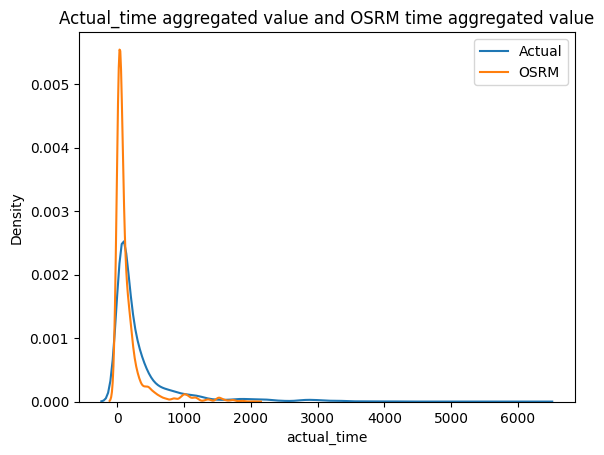

In [36]:
sns.kdeplot(data = dt_grouped, x = 'actual_time', label = 'Actual')
sns.kdeplot(data = dt_grouped, x = 'osrm_time', label = 'OSRM')
plt.legend()
plt.title('Actual_time aggregated value and OSRM time aggregated value')
plt.show()

#### We do Hypothesis testing to Check difference between Actual_time aggregated value and OSRM time aggregated value
* Null Hypothesis - There is no difference between Actual_time aggregated value and OSRM time aggregated value
* Alternative Hypothesis - There is significant difference Actual_time aggregated value and OSRM time aggregated value

In [42]:
ttest_ind(dt_grouped['actual_time'], dt_grouped['segment_osrm_time'], permutations = 100)

Ttest_indResult(statistic=33.32861975300905, pvalue=0.0)

Actual Time > OSRM Time
#### Becuase P Value is less than 0.05, we reject the Null Hypothesis
#### We can conclude that the difference between Actual_time aggregated value and OSRM time aggregated is Significant

### Comparing actual_time aggregated value and segment actual time aggregated value 

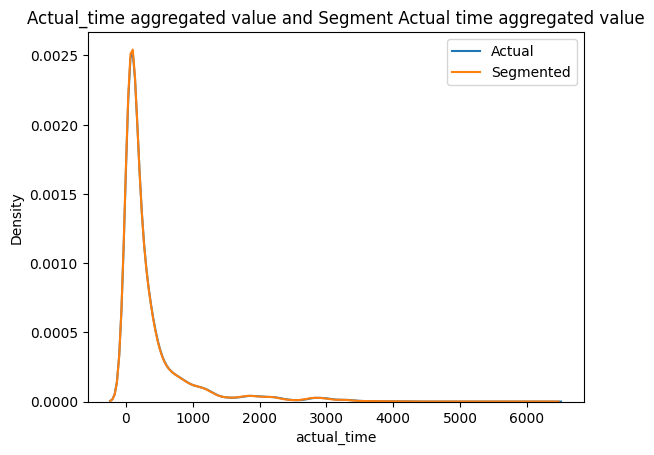

In [31]:
sns.kdeplot(data = dt_grouped, x = 'actual_time', label = 'Actual')
sns.kdeplot(data = dt_grouped, x = 'segment_actual_time', label = 'Segmented')
plt.legend()
plt.title('Actual_time aggregated value and Segment Actual time aggregated value')
plt.show()

#### We do Hypothesis testing to Check difference between Actual_time aggregated value and Segment Actual time aggregated value
* Null Hypothesis - There is no difference between Actual_time aggregated value and Segment Actual time aggregated value
* Alternative Hypothesis - There is significant difference between Actual_time aggregated value and Segment Actual time aggregated value

In [32]:
ttest_ind(dt_grouped['actual_time'], dt_grouped['segment_actual_time'], permutations = 100)

Ttest_indResult(statistic=0.5008024728897531, pvalue=0.6)

#### Becuase P Value is greater than 0.05, we fail to reject the Null Hypothesis
#### We can conclude that the difference between  Actual_time aggregated value and Segment Actual time aggregated value is not Significant

### osrm distance aggregated value and segment osrm distance aggregated value

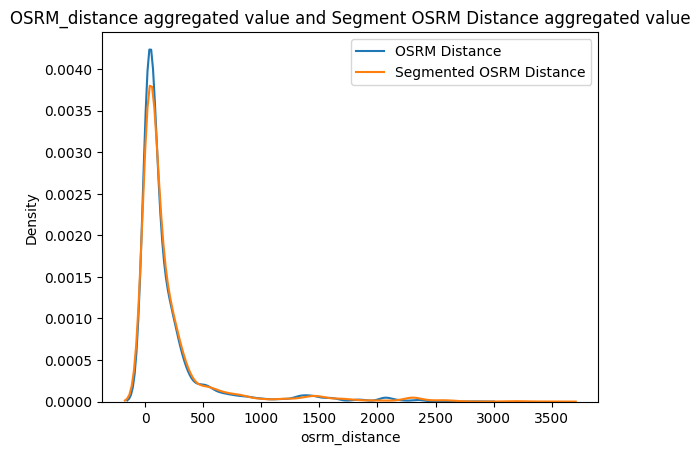

In [33]:
sns.kdeplot(data = dt_grouped, x = 'osrm_distance', label = 'OSRM Distance')
sns.kdeplot(data = dt_grouped, x = 'segment_osrm_distance', label = 'Segmented OSRM Distance')
plt.legend()
plt.title('OSRM_distance aggregated value and Segment OSRM Distance aggregated value')
plt.show()

#### We do Hypothesis testing to Check difference between OSRM_distance aggregated value and Segment OSRM Distance aggregated value
* Null Hypothesis - There is no difference between OSRM_distance aggregated value and Segment OSRM Distance aggregated value
* Alternative Hypothesis - There is significant difference OSRM_distance aggregated value and Segment OSRM Distance aggregated value

In [34]:
ttest_ind(dt_grouped['osrm_distance'], dt_grouped['segment_osrm_distance'], permutations = 100)

Ttest_indResult(statistic=-4.117367046483823, pvalue=0.0)

#### Becuase P Value is lesser than 0.05, we reject the Null Hypothesis
#### We can conclude that the difference between  OSRM_distance aggregated value and Segment OSRM Distance aggregated value is Significant

### osrm time aggregated value and segment osrm time aggregated value 

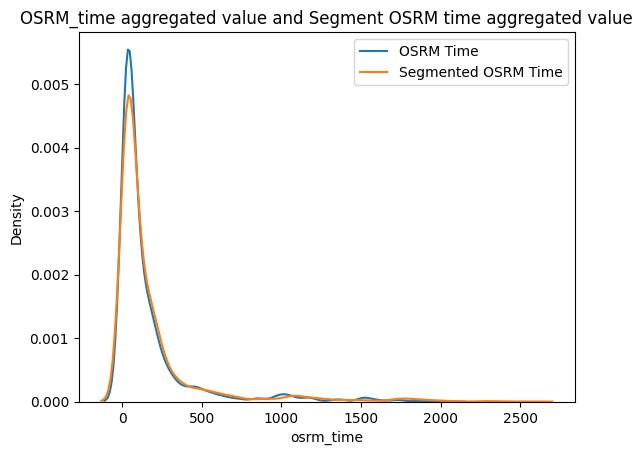

In [49]:
sns.kdeplot(data = dt_grouped, x = 'osrm_time', label = 'OSRM Time')
sns.kdeplot(data = dt_grouped, x = 'segment_osrm_time', label = 'Segmented OSRM Time')
plt.legend()
plt.title('OSRM_time aggregated value and Segment OSRM time aggregated value')
plt.show()

#### We do Hypothesis testing to Check difference between OSRM_time aggregated value and Segment OSRM time aggregated value
* Null Hypothesis - There is no difference between OSRM_time aggregated value and Segment OSRM time aggregated value
* Alternative Hypothesis - There is significant difference between OSRM_time aggregated value and Segment OSRM time aggregated value

In [50]:
ttest_ind(dt_grouped['osrm_time'], dt_grouped['segment_osrm_time'], permutations = 100)

Ttest_indResult(statistic=-5.733106696963521, pvalue=0.0)

#### Becuase P Value is lesser than 0.05, we reject the Null Hypothesis
#### We can conclude that the difference between two value is Significant.

### Handling Categorical Values - One Hot Encoding

In [59]:
dt_grouped['route_Carting'] = pd.get_dummies(dt_grouped.route_type, prefix='route').loc[:, 'route_Carting']
dt_grouped['route_FTL'] = pd.get_dummies(dt_grouped.route_type, prefix='route').loc[:, 'route_FTL']

In [61]:
dt_grouped[['route_Carting', 'route_FTL']].head(2)

,route_Carting,route_FTL
0,0,1
1,1,0


#### Similarly we can One Hot encode other Categorical Features like Day, Month , Year using the same above code

## Visualizing Data

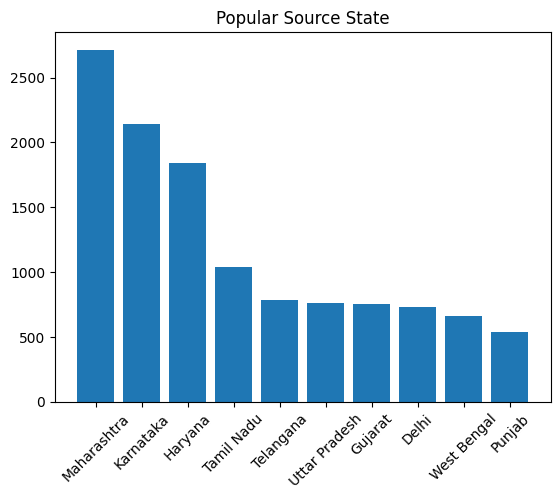

In [128]:
x = dt_grouped['source_state'].value_counts().iloc[:10].index
y = dt_grouped['source_state'].value_counts().iloc[:10].values
plt.bar(x,height=y)
plt.xticks(rotation = 45)
plt.title('Popular Source State')
plt.show()

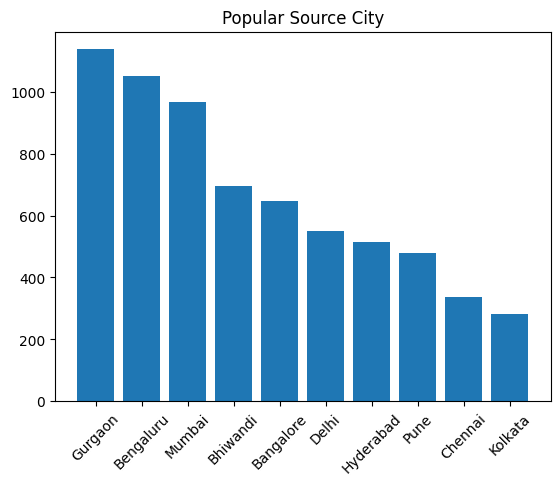

In [141]:
x = dt_grouped['source_city'].value_counts().iloc[:10].index
y = dt_grouped['source_city'].value_counts().iloc[:10].values
plt.bar(x,height=y)
plt.xticks(rotation = 45)
plt.title('Popular Source City')
plt.show()

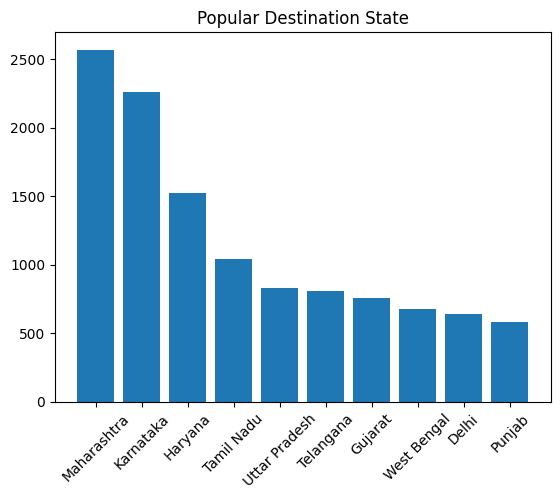

In [164]:
x = dt_grouped['destination_state'].value_counts().iloc[:10].index
y = dt_grouped['destination_state'].value_counts().iloc[:10].values
plt.bar(x,height=y)
plt.xticks(rotation = 45)
plt.title('Popular Destination State')
plt.show()

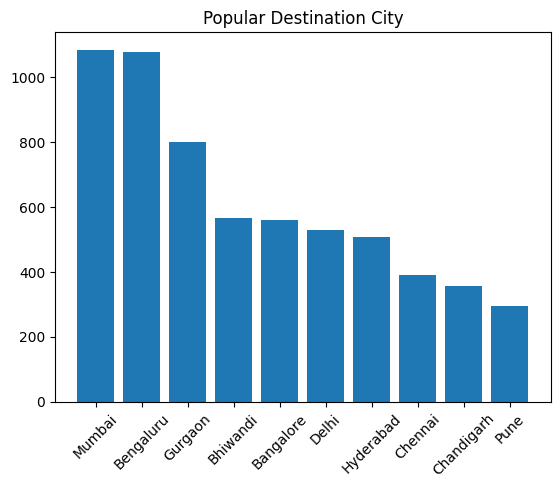

In [165]:
x = dt_grouped['destination_city'].value_counts().iloc[:10].index
y = dt_grouped['destination_city'].value_counts().iloc[:10].values
plt.bar(x,height=y)
plt.xticks(rotation = 45)
plt.title('Popular Destination City')
plt.show()

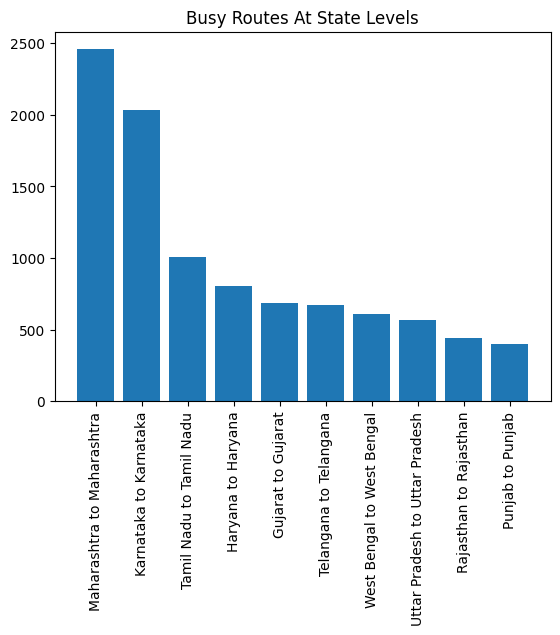

In [166]:
x = [i[0]+' to '+i[1] for i in dt_grouped[['source_state', 'destination_state']].value_counts().iloc[:10].index]
y = dt_grouped[['source_state', 'destination_state']].value_counts().iloc[:10].values
plt.bar(x,height=y)
plt.xticks(rotation = 90)
plt.title('Busy Routes At State Levels')
plt.show()

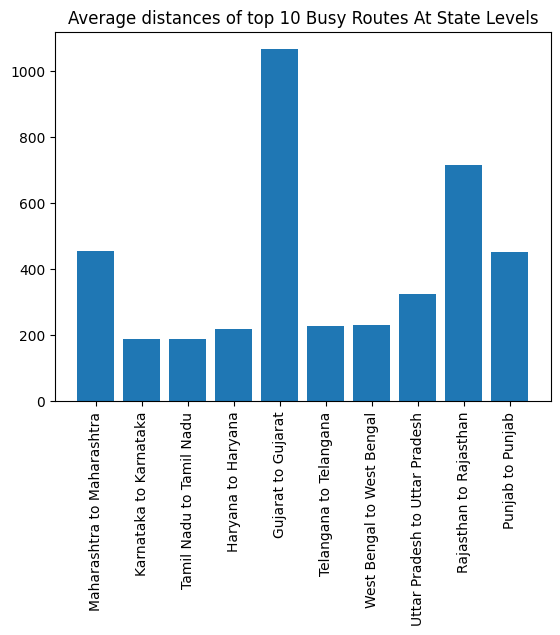

In [169]:
d = dt_grouped[['source_state', 'destination_state', 'actual_distance_to_destination']].groupby(['source_state', 'destination_state']).aggregate({'actual_distance_to_destination':['count', 'mean']})
d.columns = ['_'.join(i) for i in d.columns]
d = d.reset_index()
d = d.sort_values(by = 'actual_distance_to_destination_count', ascending = False)

x =  [i[0]+' to '+i[1] for i in d[['source_state', 'destination_state']].values[:10]]
y =  [i[0] for i in d[['actual_distance_to_destination_mean']].values[:10]]

plt.bar(x,height=y)
plt.xticks(rotation = 90)
plt.title('Average distances of top 10 Busy Routes At State Levels')
plt.show()

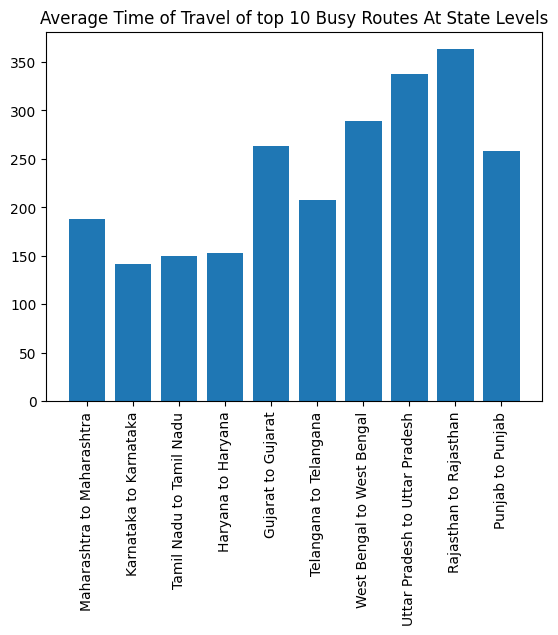

In [170]:
d = dt_grouped[['source_state', 'destination_state', 'actual_time']].groupby(['source_state', 'destination_state']).aggregate({'actual_time':['count', 'mean']})
d.columns = ['_'.join(i) for i in d.columns]
d = d.reset_index()
d = d.sort_values(by = 'actual_time_count', ascending = False)

x =  [i[0]+' to '+i[1] for i in d[['source_state', 'destination_state']].values[:10]]
y =  [i[0] for i in d[['actual_time_mean']].values[:10]]

plt.bar(x,height=y)
plt.xticks(rotation = 90)
plt.title('Average Time of Travel of top 10 Busy Routes At State Levels')
plt.show()

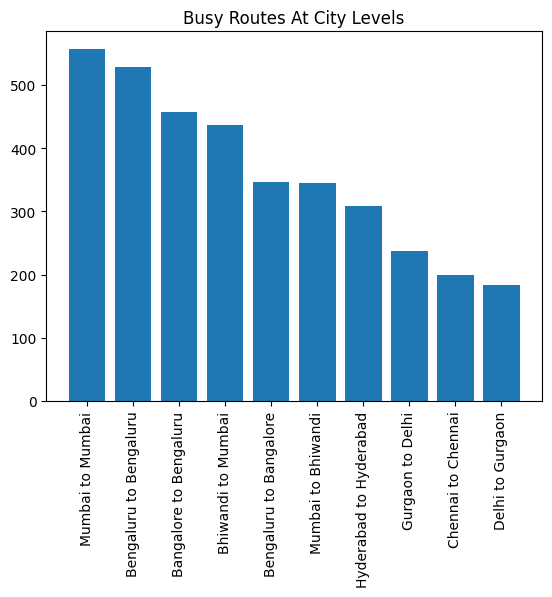

In [149]:
x = [i[0]+' to '+i[1] for i in dt_grouped[['source_city', 'destination_city']].value_counts().iloc[:10].index]
y = dt_grouped[['source_city', 'destination_city']].value_counts().iloc[:10].values
plt.bar(x,height=y)
plt.xticks(rotation = 90)
plt.title('Busy Routes At City Levels')
plt.show()

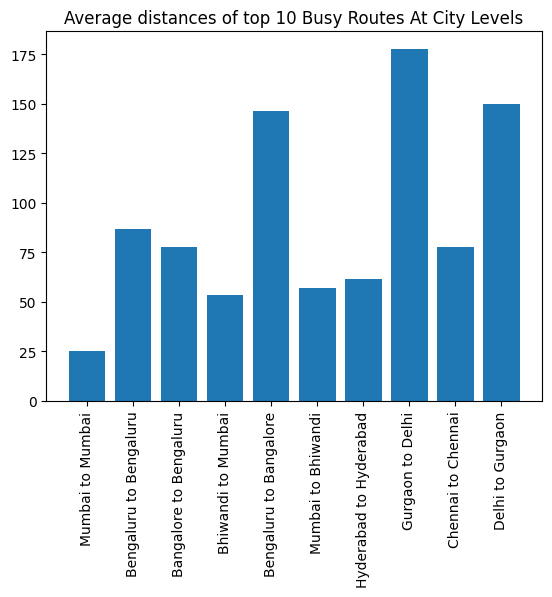

In [171]:
d = dt_grouped[['source_city', 'destination_city', 'actual_distance_to_destination']].groupby(['source_city', 'destination_city']).aggregate({'actual_distance_to_destination':['count', 'mean']})
d.columns = ['_'.join(i) for i in d.columns]
d = d.reset_index()
d = d.sort_values(by = 'actual_distance_to_destination_count', ascending = False)

x =  [i[0]+' to '+i[1] for i in d[['source_city', 'destination_city']].values[:10]]
y =  [i[0] for i in d[['actual_distance_to_destination_mean']].values[:10]]

plt.bar(x,height=y)
plt.xticks(rotation = 90)
plt.title('Average distances of top 10 Busy Routes At City Levels')
plt.show()

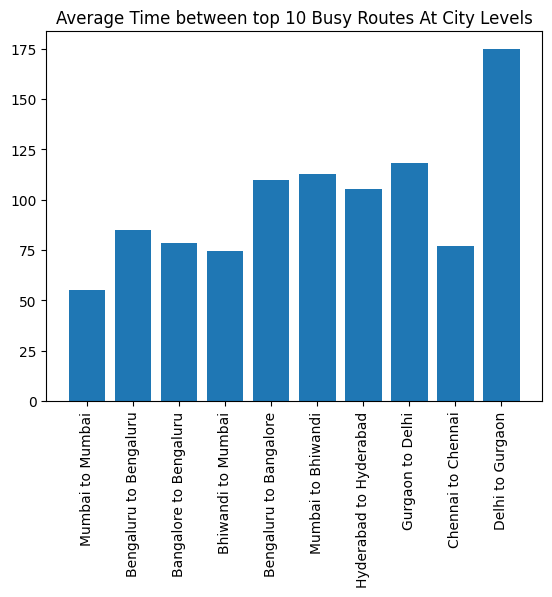

In [172]:
d = dt_grouped[['source_city', 'destination_city', 'actual_time']].groupby(['source_city', 'destination_city']).aggregate({'actual_time':['count', 'mean']})
d.columns = ['_'.join(i) for i in d.columns]
d = d.reset_index()
d = d.sort_values(by = 'actual_time_count', ascending = False)

x =  [i[0]+' to '+i[1] for i in d[['source_city', 'destination_city']].values[:10]]
y =  [i[0] for i in d[['actual_time_mean']].values[:10]]

plt.bar(x,height=y)
plt.xticks(rotation = 90)
plt.title('Average Time between top 10 Busy Routes At City Levels')
plt.show()

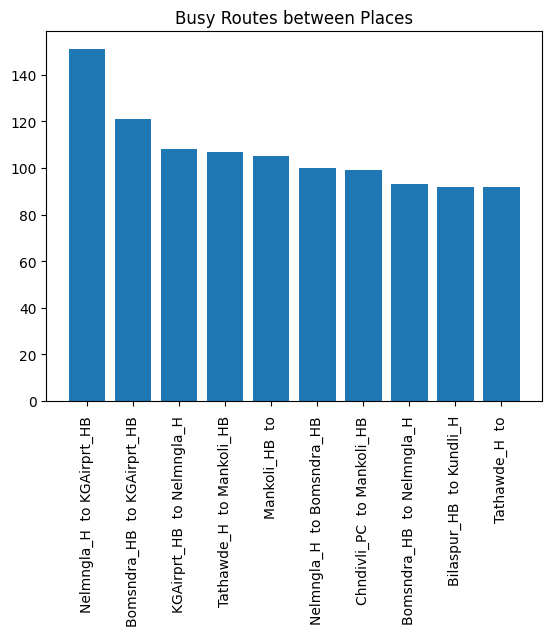

In [152]:
x = [i[0]+' to '+i[1] for i in dt_grouped[['source_place-code', 'destination_place-code']].value_counts().iloc[:10].index]
y = dt_grouped[['source_place-code', 'destination_place-code']].value_counts().iloc[:10].values
plt.bar(x,height=y)
plt.xticks(rotation = 90)
plt.title('Busy Routes between Places')
plt.show()

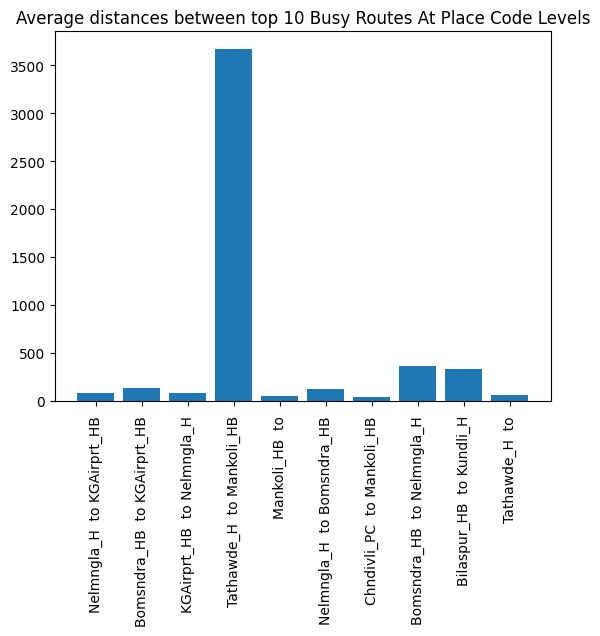

In [93]:
d = dt_grouped[['source_place-code', 'destination_place-code', 'actual_distance_to_destination']].groupby(['source_place-code', 'destination_place-code']).aggregate({'actual_distance_to_destination':['count', 'mean']})
d.columns = ['_'.join(i) for i in d.columns]
d = d.reset_index()
d = d.sort_values(by = 'actual_distance_to_destination_count', ascending = False)

x =  [i[0]+' to '+i[1] for i in d[['source_place-code', 'destination_place-code']].values[:10]]
y =  [i[0] for i in d[['actual_distance_to_destination_mean']].values[:10]]

plt.bar(x,height=y)
plt.xticks(rotation = 90)
plt.title('Average distances between top 10 Busy Routes At Place Code Levels')
plt.show()

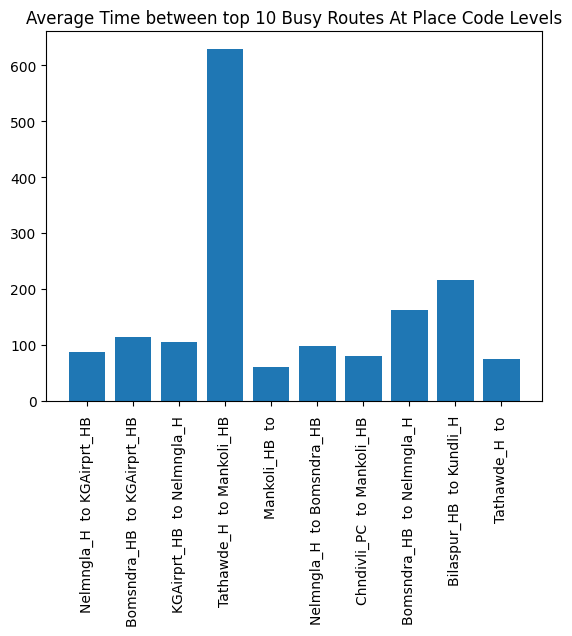

In [173]:
d = dt_grouped[['source_place-code', 'destination_place-code', 'actual_time']].groupby(['source_place-code', 'destination_place-code']).aggregate({'actual_time':['count', 'mean']})
d.columns = ['_'.join(i) for i in d.columns]
d = d.reset_index()
d = d.sort_values(by = 'actual_time_count', ascending = False)

x =  [i[0]+' to '+i[1] for i in d[['source_place-code', 'destination_place-code']].values[:10]]
y =  [i[0] for i in d[['actual_time_mean']].values[:10]]

plt.bar(x,height=y)
plt.xticks(rotation = 90)
plt.title('Average Time between top 10 Busy Routes At Place Code Levels')
plt.show()

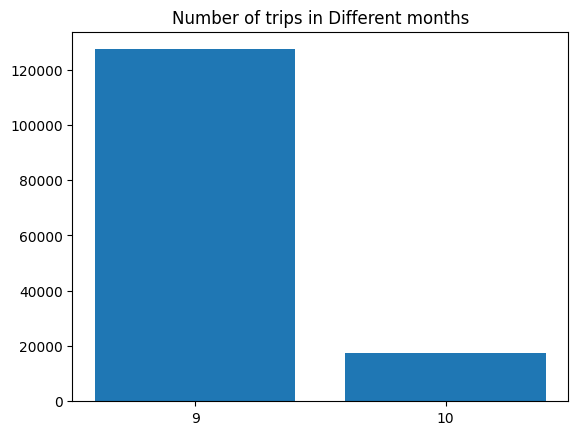

In [126]:
x = dt['trip_creation_time_month'].value_counts().index
y = dt['trip_creation_time_month'].value_counts().values
plt.bar(x,height=y)
plt.title('Number of trips in Different months')
plt.xticks( list(x))
plt.show()

### MinMax Scaler
Before scaling the data, we will split it into Train and Test,

We will fit the method on Train data and transform both Train and Test Data.

Following are the Columns which we will Scale - 

* start_scan_to_end_scan
* actual_distance_to_destination
* segment_osrm_distance
* actual_time
* osrm_time
* osrm_distance
* segment_actual_time
* segment_osrm_time

In [97]:
dt_grouped_train = dt_grouped[dt_grouped['data']=='training']
dt_grouped_test = dt_grouped[dt_grouped['data']=='test']

MMS = MinMaxScaler()

In [98]:
# Fitting the Standard Sclaer
MMS.fit(dt_grouped_train[['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']])

MinMaxScaler()

In [100]:
# Trasnforming the Data using MinMax Sclaer
dt_grouped_train.loc[:, ['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']] = MMS.transform(dt_grouped_trained.loc[:, ['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']])

dt_grouped_test.loc[:, ['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']] = MMS.transform(dt_grouped_test.loc[:, ['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']])

In [101]:
dt_grouped_trained[['start_scan_to_end_scan', 'actual_distance_to_destination', 'segment_osrm_distance', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time']].head(2)

,start_scan_to_end_scan,actual_distance_to_destination,segment_osrm_distance,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time
0,0.382811,0.104014,0.373134,0.307083,0.350791,0.347060,0.306497,0.391474
1,0.026879,0.002717,0.021373,0.026316,0.030138,0.026866,0.026106,0.022683


### Handling the outliers using the IQR method

* Here the Outliers are because of some locations which lie very far away.

In [103]:
def outlier(data):
    '''
    Function to Identify Outliers and Impute the Outliers using IQR Method
    '''
    for i in data:
        if (dt[i].dtype == np.float) | (dt[i].dtype == np.int):
    
            iqr = np.percentile(data[i].values, 75) - np.percentile(data[i].values, 25)
            upper_limit = np.percentile(data[i].values, 75) + iqr*1.5 
            lower_limit = np.percentile(data[i].values, 25) - iqr*1.5 
            
            data[i][(data[i]<lower_limit)] = lower_limit
            data[i][(data[i]>upper_limit)] = upper_limit
                           
                           
    return data

In [106]:
dt_cleaned = outlier(dt)

## Business Insights 
* Top 10 Popular Source States are - 'Maharashtra' , 'Karnataka', 'Haryana', 'Tamil Nadu', 'Telangana','Uttar Pradesh', 'Gujarat', 'Delhi', 'West Bengal', 'Punjab'

* Top 10 Popular Source Cities are - 'Gurgaon', 'Bengaluru', 'Mumbai', 'Bhiwandi', 'Bangalore', 'Delhi', 'Hyderabad', 'Pune', 'Chennai', 'Kolkata'

* Top 10 Popular Destination States are - 'Maharashtra', 'Karnataka', 'Haryana', 'Tamil Nadu', 'Uttar Pradesh', 'Telangana', 'Gujarat', 'West Bengal', 'Delhi', 'Punjab'

* Top 10 Popular Destination Cities are - 'Mumbai', 'Bengaluru', 'Gurgaon', 'Bhiwandi', 'Bangalore', 'Delhi', 'Hyderabad', 'Chennai', 'Chandigarh', 'Pune'

* Top 10 Busiest Routes at State level - 'Maharashtra to Maharashtra', 'Karnataka to Karnataka', 'Tamil Nadu to Tamil Nadu', 'Haryana to Haryana', 'Gujarat to Gujarat', 'Telangana to Telangana', 'West Bengal to West Bengal', 'Uttar Pradesh to Uttar Pradesh', 'Rajasthan to Rajasthan', 'Punjab to Punjab'

* Top 10 Busiest Routes at City Level - 'Mumbai to Mumbai', 'Bengaluru to Bengaluru', 'Bangalore to Bengaluru', 'Bhiwandi to Mumbai', 'Bengaluru to Bangalore', 'Mumbai to Bhiwandi', 'Hyderabad to Hyderabad', 'Gurgaon to Delhi', 'Chennai to Chennai','Delhi to Gurgaon'

* Top Busiest Routes between places - 'Nelmngla_H  to KGAirprt_HB ', 'Bomsndra_HB  to KGAirprt_HB ', 'KGAirprt_HB  to Nelmngla_H ', 'Tathawde_H  to Mankoli_HB ', 'Nelmngla_H  to Bomsndra_HB ', 'Chndivli_PC  to Mankoli_HB ', 'Bomsndra_HB  to Nelmngla_H ', 'Bilaspur_HB  to Kundli_H '.

* Among the Busiest routes at City level, Gurgaon to Delhi has the highest average distance.
* Among the Busiest routes between Places, Tathawade_H to Mankoli_HB is has the heighest avegare distance.


The below points may lead to mis calculations - 
* The Actual Time and OSRM time have significant difference between them.
* The difference between OSRM distance and OSRM Segmented Distance is also Significant
* Similarly the difference between OSRM time and OSRM time aggregated is significant.

* Among the Busiest routes at State Level, Rajasthan to Rajastha is most time taking followed by Uttar Pradesh to Uttar Pradesh.
* Among the Busiest routes at City level, Delhi to Gurgaon is most Time taking trip.
* Among the Busiest routes at Place level, Tathawde_H  to Mankoli_HB is the most time taking trip.

## Recomendations - 

* The difference between Actual Time and OSRM is Significant. This can cause a very major impact on the comapny. Becuase the OSRM wrongly predicts the estimated time, the customers might get a wrong estimate, and might receive their packages with delay. 
* This wrong estimation of time might also result in disruptions of Operations.
* OSRM_distance aggregated value and Segment OSRM Distance AND OSRM_time aggregated value and Segment OSRM time aggregated value have significant difference. These may lead to a major issues in the operations.
* Mumbai, Banglore and Gurgaon are the Cities which has Most number of delivery services, hence its important to make sure that proper facilities and work force is always there to handle it.
* Its also evident that the routes within Mahrashtra, Karnataka and Tamil Nadu are one of the most busy paths. Its important to know good number of back up paths to move between Source and Destination.
* When it comes to time of travel, travels within Rajasthan, Uttarpradesh and West Bengal is more time taking. Hence its important to optimise these travels, like travelling during less Traffic . This is will save Fuel and Time.